### What you need
plot the rolling ave speed over a map of your bike rides

* dependencies

read this for retriving  csv files from  https://www.polar.com/accesslink-api/?python#authentication

In [1]:
import pandas as pd
import numpy as np
import gpxpy

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
%matplotlib inline
import glob
import folium

In [29]:
gpx_files = glob.glob('./data/*.gpx')
csv_files = glob.glob('./data/*.csv')

In [27]:
def extract_segments(gpx_file ):
    gpx_file = open(gpx_file, 'r')
    gpx = gpxpy.parse(gpx_file)
    lat = []
    lon = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat.append(point.latitude)
                lon.append(point.longitude)
    segments = list(zip(lat , lon))
           
    return segments            

In [24]:
def create_df(csv_file):
    alles = pd.read_csv(csv_file,header=0)
    general_stats = alles.iloc[0,:]
    df = pd.DataFrame(alles.iloc[2:,:].values, columns = alles.iloc[1,:] )
    ZEROS = df[df['Distances (m)'].apply(lambda x : float(x) == 0)].shape[0]
    df = df[df['Distances (m)'].apply(lambda x : float(x)  ) > 0]
    return df , general_stats , ZEROS

In [13]:
csv_files = glob.glob('./data/*.csv')

In [14]:
csv_files[0]

'./data\\Daniel_Pavlicek_2020-04-04_12-30-58.CSV'

In [25]:
df , general_stats , ZEROS = create_df(csv_files[0])

In [115]:
general_stats

Name                             Daniel Pavlicek
Sport                                ROAD_BIKING
Date                                  04-04-2020
Start time                              12:30:58
Duration                                05:24:46
Total distance (km)                       143.01
Average heart rate (bpm)                     142
Average speed (km/h)                        26.4
Max speed (km/h)                            49.0
Average pace (min/km)                      02:16
Max pace (min/km)                          01:13
Calories                                    3842
Fat percentage of calories(%)                 38
Average cadence (rpm)                        NaN
Average stride length (cm)                   NaN
Running index                                NaN
Training load                                NaN
Ascent (m)                                   415
Descent (m)                                  440
Average power (W)                            NaN
Max power (W)       

In [134]:
speed , hr = df['Speed (km/h)'] , df['HR (bpm)']

In [135]:
speed = np.array([float(x) for x in (speed.values)])
hr = np.array([float(x) for x in (hr.values)])

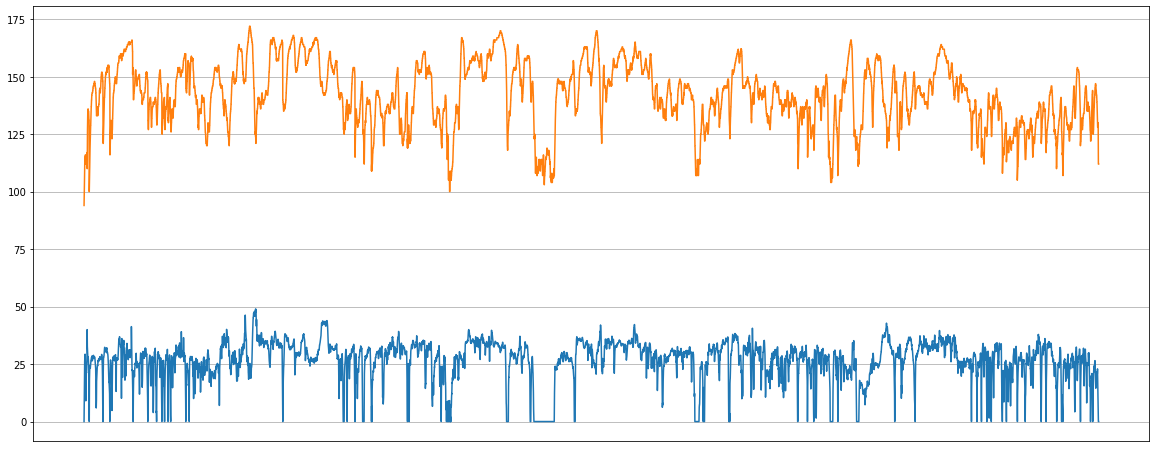

In [137]:
#plot hr and speed
plt.figure(figsize =(20,8 ))
plt.xticks([])
plt.yticks()
plt.plot(speed)
plt.plot(hr)
plt.grid()

In [17]:
#10 sec rolling mean
rolling_ave = np.convolve(speed, np.ones((10,))/10, mode='valid')

In [18]:
len(rolling_ave)

19390

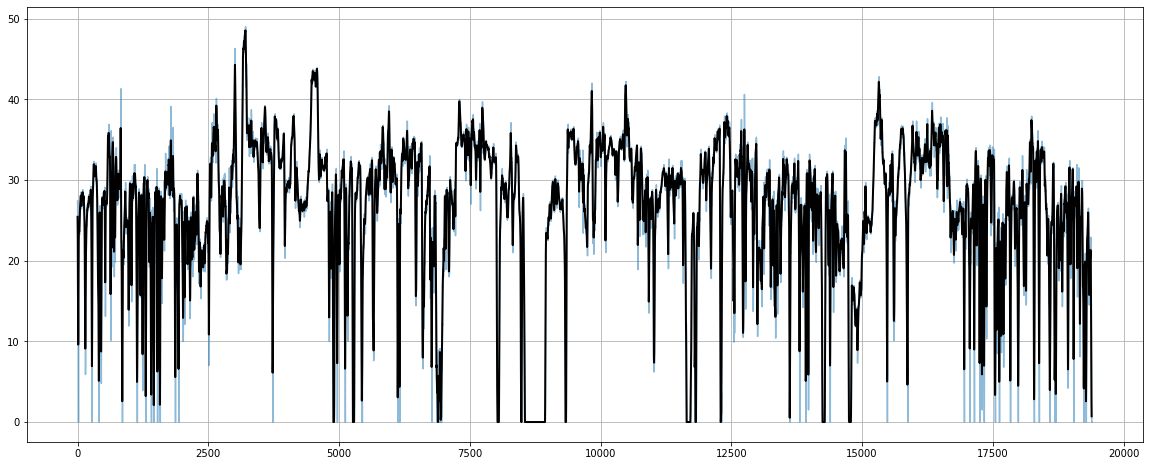

In [19]:
plt.figure(figsize =(20,8 ))
plt.grid()
plt.plot(speed,alpha = 0.5)
plt.plot(rolling_ave, linewidth = 2 , c = 'black')

# parse gpx file

In [148]:
csv_files;csv_files

['./data\\Daniel_Pavlicek_2020-04-04_12-30-58.CSV',
 './data\\Daniel_Pavlicek_2020-04-08_09-53-42.CSV']

In [147]:
gpx_files = glob.glob('./data/*.gpx');gpx_files

['./data\\Daniel_Pavlicek_2020-04-04_12-30-58.GPX',
 './data\\Daniel_Pavlicek_2020-04-08_09-53-42.GPX']

['./data\\Daniel_Pavlicek_2020-04-04_12-30-58.GPX',
 './data\\Daniel_Pavlicek_2020-04-08_09-53-42.GPX']

In [161]:
segments = extract_segments(gpx_file[0])

In [162]:
len(list(segments))

19483

In [29]:
points = gpx.get_points_data()

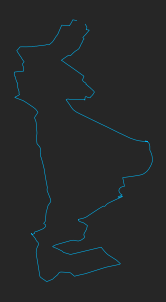

In [47]:
fig = plt.figure(facecolor = '0.15')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)
plt.plot(lon, lat, color = 'deepskyblue', lw = 0.5, alpha = 1)

In [16]:
len(lat),len(lon),len(speed)

(9443, 9443, 9443)

In [48]:
elevation = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            elevation.append(point.elevation)


In [49]:
len(elevation)

8373

In [50]:
points = np.array([lon,lat]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1], points[1:]],axis = 1)

In [51]:
len(segments)

8372

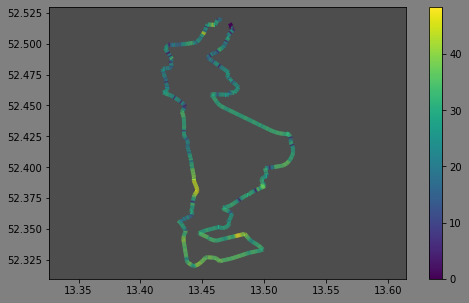

In [52]:
x = np.array(lon)
y = np.array(lat)
dydx = np.array(speed)  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(8,5),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
axs.axis('equal')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)


plt.show()

In [53]:
elevation = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            elevation.append(point.elevation)


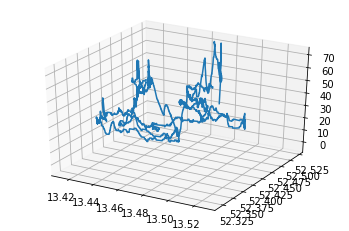

In [54]:
#3d projection
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.array(lon)
y = np.array(lat)
z = np.array(elevation)
dydx = np.array(speed)  # first derivative
ax.plot(x,y,z)
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
#points = np.array([x, y]).T.reshape(-1, 1, 2)
#segments = np.concatenate([points[:-1], points[1:]], axis=1)


#fig = plt.figure(figsize=(20,10),facecolor = '0.5')
#axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
#norm = plt.Normalize(dydx.min(), dydx.max())
#lc = LineCollection(segments, cmap='viridis', norm=norm)

#lc.set_array(dydx)
#lc.set_linewidth(4)
#lc.set_alpha(1)
#line = axs.add_collection(lc)
#fig.colorbar(line, ax=axs)

ax.set_xlim(x.min()-0.01, x.max()+0.01)
ax.set_ylim(y.min()-0.01, y.max()+0.01)


plt.show()

the fausto coppi ride still to download

In [26]:
speed = coppi.iloc[2:,3]

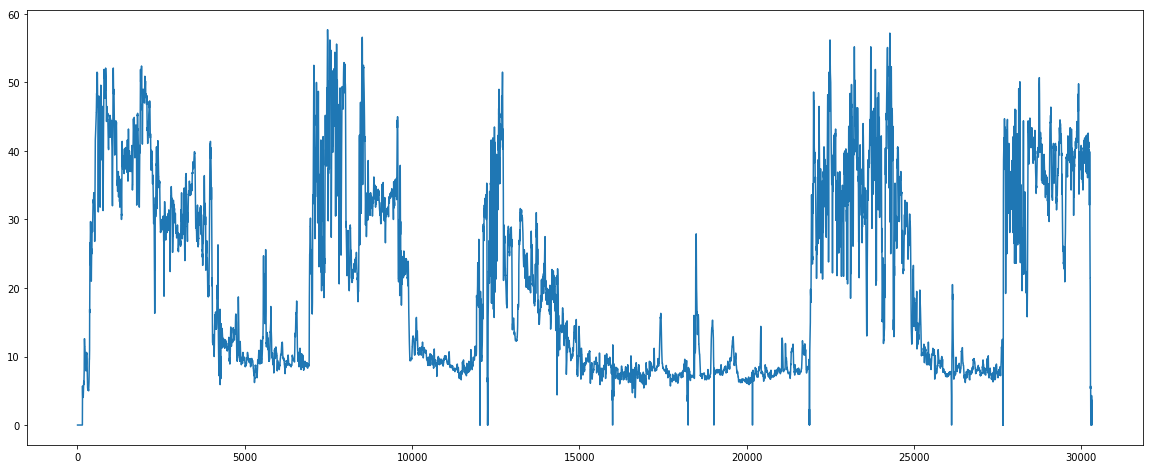

In [27]:
plt.figure(figsize =(20,8 ))

plt.plot(speed)

In [36]:
#speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.convolve(speed, np.ones((30,))/30, mode='valid')

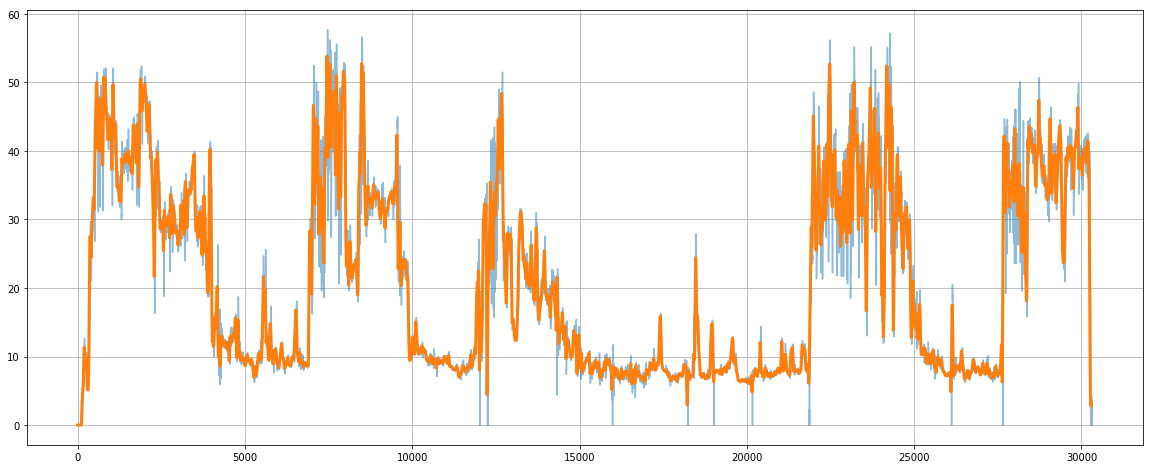

In [37]:
plt.figure(figsize =(20,8 ))
plt.grid()
plt.plot(speed,alpha = 0.5)
plt.plot(rolling_ave, linewidth = 3)

In [34]:

gpx_file = open('./coppi/coppi.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
lat = []
lon = []
elevation = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)
            elevation.append(point.elevation)

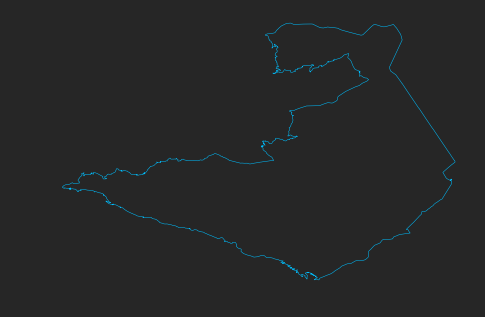

In [39]:
fig = plt.figure(facecolor = '0.15')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)
plt.plot(lon, lat, color = 'deepskyblue', lw = 0.5, alpha = 1)

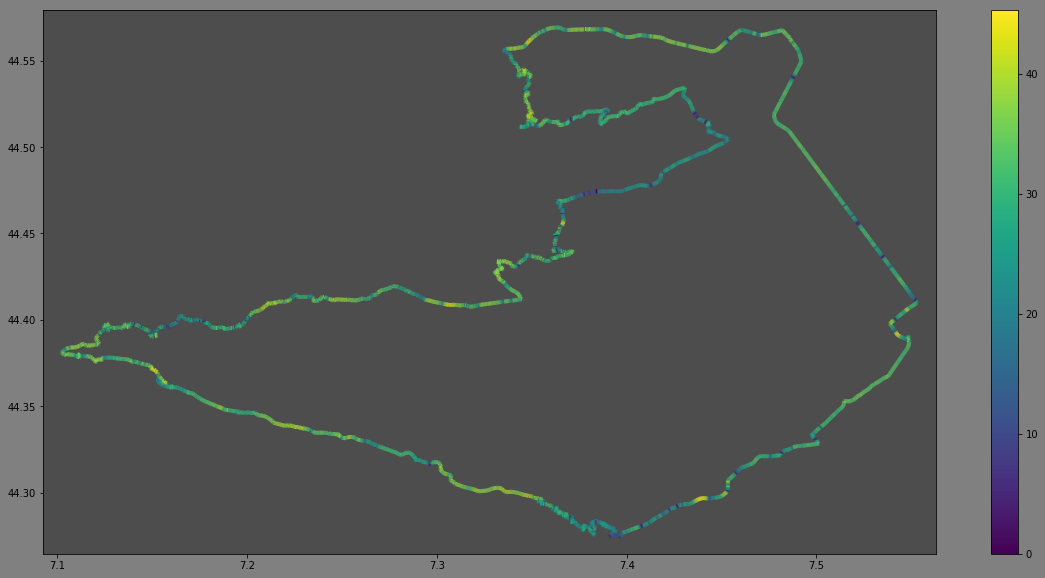

In [36]:


x = np.array(lon)
y = np.array(lat)
dydx = np.array(speed)  # first derivative
z = np.array(elevation)
# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)

lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)


plt.show()

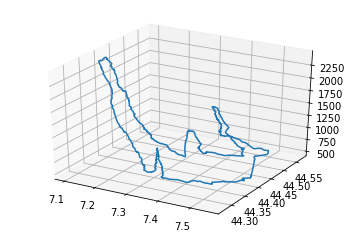

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(lon)
y = np.array(lat)
#dydx = np.array(speed)  # first derivative
z = np.array(elevation)

ax.plot(x,y,z)

In [25]:
cd C:/Users/DantePawn/Documents/Untitled Folder/

C:\Users\DantePawn\Documents\Untitled Folder


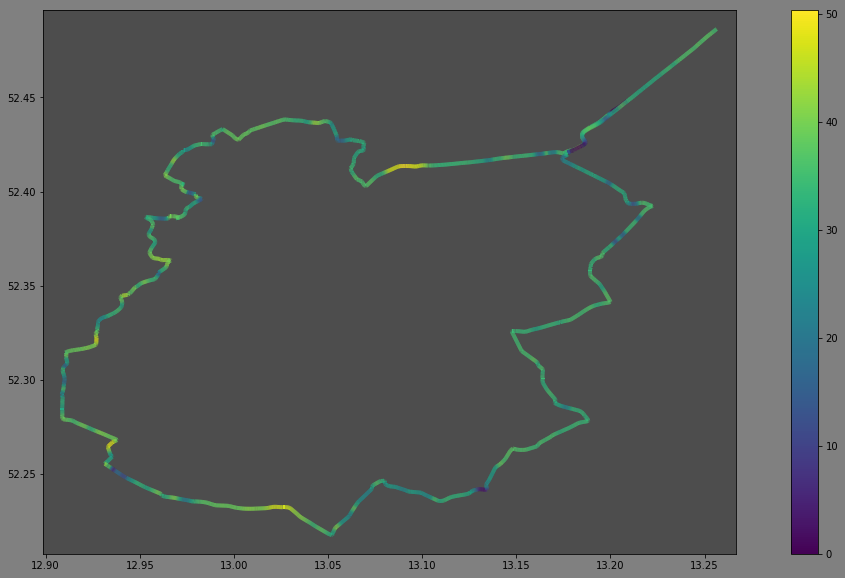

In [17]:
csv_file = pd.read_csv('./blanken/Blankensee.csv')
speed = csv_file.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.convolve(speed, np.ones((30,))/30., mode='valid')

gpx_file = open('./blanken/Blankensee.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
lat = []
lon = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)


x = np.array(lon)
y = np.array(lat)
dydx = np.array(rolling_ave)  # rolling ave

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)
axs.set_aspect('equal')


plt.show()            


In [3]:
berlin = pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.csv')

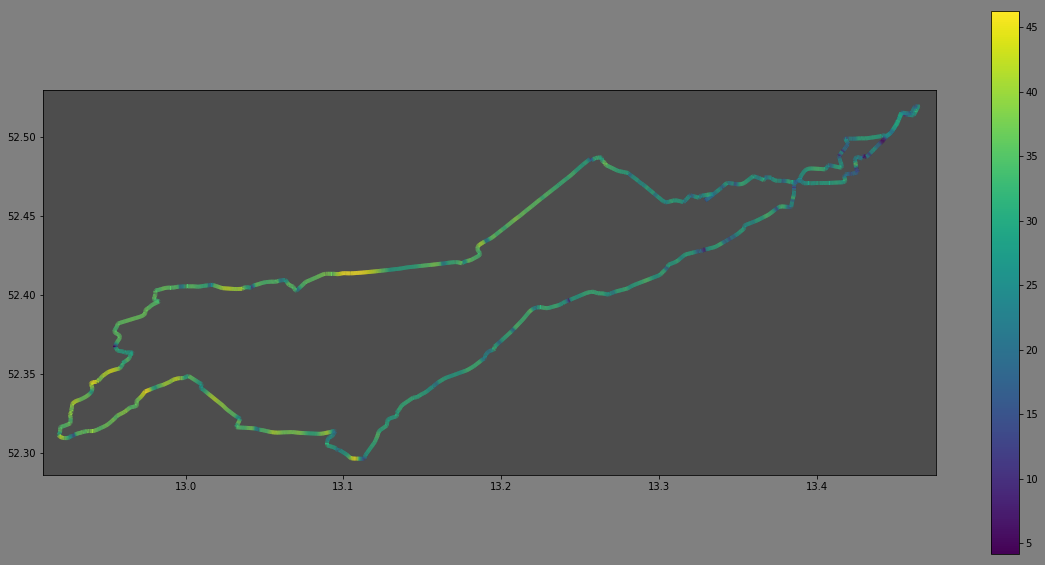

In [8]:
csv_file =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.csv')
speed = csv_file.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.convolve(speed, np.ones((30,))/30., mode='valid')

gpx_file = open('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
lat = []
lon = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)


x = np.array(lon)
y = np.array(lat)
dydx = np.array(rolling_ave)  # rolling ave

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)
axs.set_aspect('equal')


plt.savefig('sunday.jpeg')      

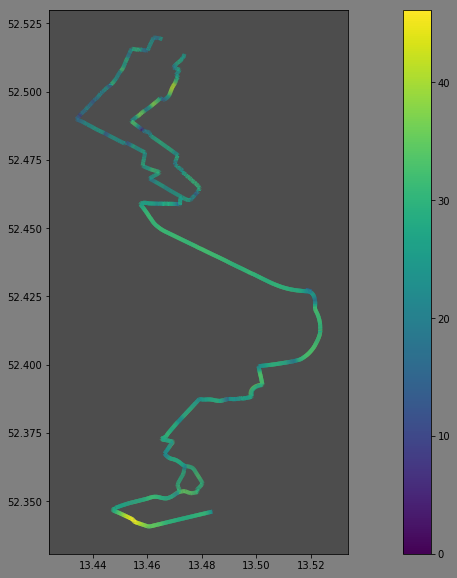

In [11]:

csv_file =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.csv')
speed = csv_file.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.convolve(speed, np.ones((30,))/30., mode='valid')

gpx_file = open('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
lat = []
lon = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)


x = np.array(lon)
y = np.array(lat)
dydx = np.array(rolling_ave)  # rolling ave

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)
axs.set_aspect('equal')

plt.show()
#plt.savefig('friday.jpeg')     

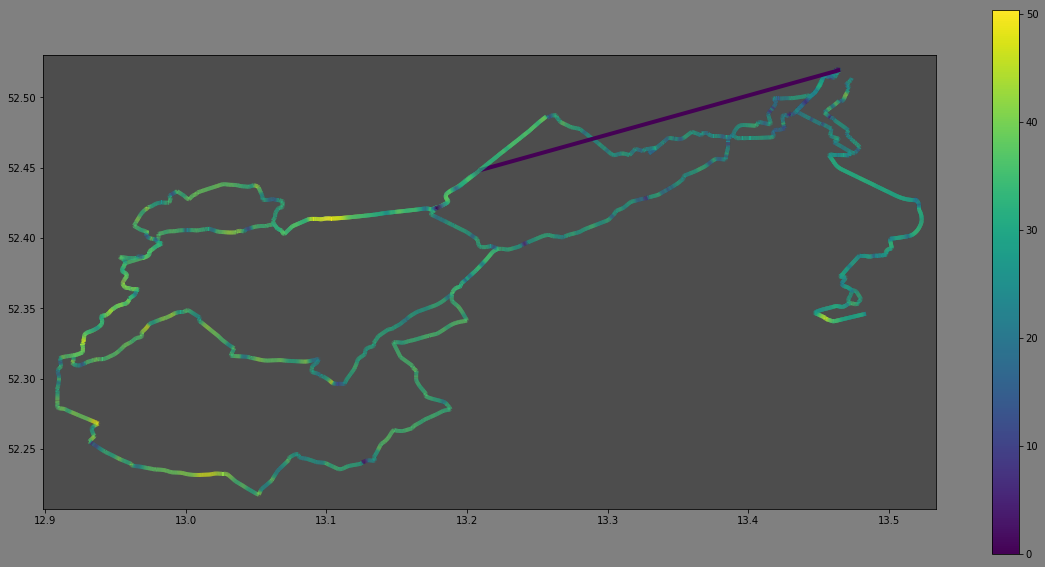

In [22]:
csv_file_1 =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.csv')
csv_file_2 =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.csv')
rolling_ave = np.array([])
lat = []
lon = []

speed = csv_file_1.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave  = np.concatenate([rolling_ave ,np.convolve(speed, np.ones((30,))/30., mode='valid')])

speed = csv_file_2.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.concatenate([rolling_ave ,np.convolve(speed, np.ones((30,))/30., mode='valid')])

gpx_file = open('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.gpx', 'r')
gpx = gpxpy.parse(gpx_file)


for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)
            
gpx_file = open('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.gpx', 'r')
gpx = gpxpy.parse(gpx_file)


for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)

            csv_file = pd.read_csv('./blanken/Blankensee.csv')
speed = csv_file.iloc[2:,3]
speed = np.array([float(x) for x in (speed.values)])
rolling_ave = np.concatenate([rolling_ave ,np.convolve(speed, np.ones((30,))/30., mode='valid')])

gpx_file = open('./blanken/Blankensee.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            lat.append(point.latitude)
            lon.append(point.longitude)

x = np.array(lon)
y = np.array(lat)
dydx = np.array(rolling_ave)  # rolling ave

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)

lc.set_array(dydx)
lc.set_linewidth(4)
lc.set_alpha(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.01)
axs.set_ylim(y.min()-0.01, y.max()+0.01)
axs.set_aspect('equal')

plt.show()



In [21]:
len(rolling_ave)

23398

In [51]:
csv_file_1 =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.csv')
csv_file_2 =  pd.read_csv('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.csv')
csv_file_3 = pd.read_csv('./blanken/Blankensee.csv')
gpx_file_1 = open('./berlin/Daniel_Pavlicek_2018-09-14_18-32-39.gpx', 'r')
gpx_file_2 = open('./berlin/Daniel_Pavlicek_2018-09-16_08-04-30.gpx', 'r')
gpx_file_3 = open('./blanken/Blankensee.gpx', 'r')

In [52]:
routes = {1:(csv_file_1,gpx_file_1),2:(csv_file_2,gpx_file_2),3:(csv_file_3,gpx_file_3)}

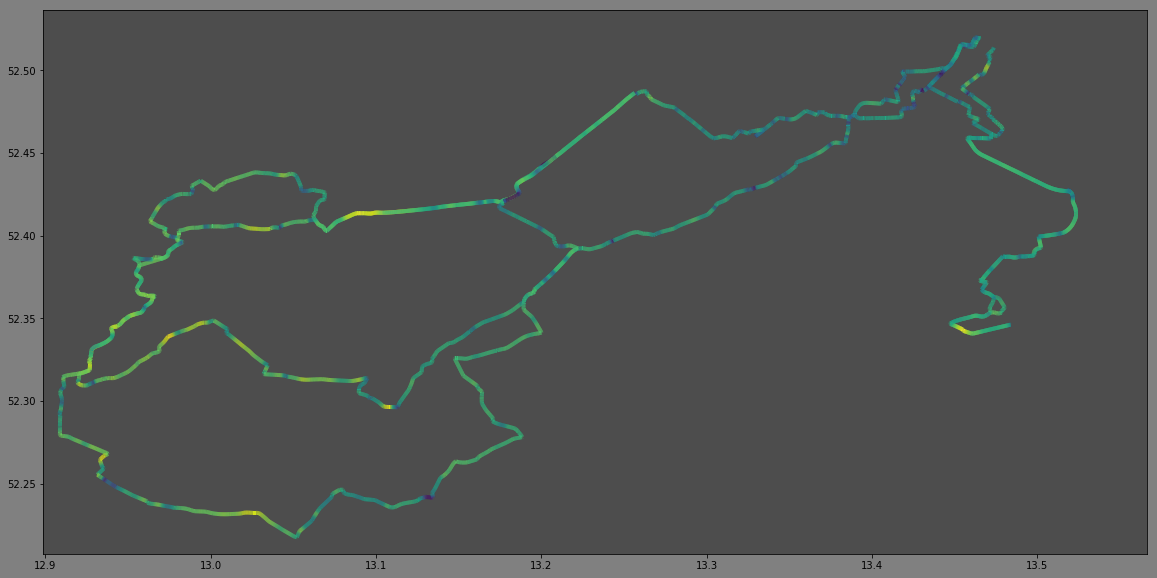

In [53]:
fig = plt.figure(figsize=(20,10),facecolor = '0.5')
axs = plt.axes(facecolor = '0.3')


for file in range(1,4):
    
    rolling_ave = np.array([])
    lat = []
    lon = []
    
    speed = routes[file][0].iloc[2:,3]
    speed = np.array([float(x) for x in (speed.values)])
    rolling_ave  = np.convolve(speed, np.ones((30,))/30., mode='valid')

    
    gpx = gpxpy.parse(routes[file][1])


    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                lat.append(point.latitude)
                lon.append(point.longitude)

    x = np.array(lon)
    y = np.array(lat)
    dydx = np.array(rolling_ave)  # rolling ave

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = plt.Normalize(dydx.min(), dydx.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)



# Create a continuous norm to map from data points to colors


    lc.set_array(dydx)
    lc.set_linewidth(4)
    lc.set_alpha(1)
    #line = axs.add_collection(lc)
    axs.add_collection(lc)
    #fig.colorbar(line, ax=axs)

axs.set_xlim(x.min()-0.01, x.max()+0.31)
axs.set_ylim(y.min()-0.01, y.max()+0.05)
axs.set_aspect('equal')    

plt.show()


### Folium 


In [3]:
def plot_speed(segments , rolling_ave):
    
    centerY = np.mean([c[0] for c in segments])
    centerX = np.mean([c[1] for c in segments])
    
    base  = folium.Map(location = (centerY,centerX ), tiles = 'cartoDBpositron',width = '100%',height='100%')
    folium.ColorLine(
        positions = segments,
        colors = rolling_ave,
        colormap =  colormap,
        weight = 3
        ).add_to(base)
    return base

In [ ]:
#define a colormap for the speeds
from branca.colormap import linear 

#to create the color map
min_col = rolling_ave.min()
max_col = rolling_ave.max()

colormap = linear.viridis.scale(min_col,max_col)

In [ ]:
segments = extract_segments(gpx_files[0])
df , stats = create_df(csv_files[0])
speed = df['Speed (km/h)'].map(float)
rolling_ave = np.convolve(speed, np.ones((10,))/10, mode='valid')

In [67]:
np.convolve(speed, np.ones((10,))/10)

array([0.  , 0.25, 0.78, ..., 0.  , 0.  , 0.  ])

In [68]:
plot_speed(segments , rolling_ave)

Simple PolyLine one color

In [33]:
m  = folium.Map(location = (52.40,13.2), tiles = 'cartoDBpositron',width = '70%',height='70%')
folium.PolyLine(segments).add_to(m)

m